#Convolutional Neural Network


***ABSTRACT***

***This is a hands-on practice of using Keras and Tensorflow to build and train a Convolutional Neural Network (CNN) against MNIST Dataset which has 70,000  handwritten digit black/white images with 28x28 pixels in 10 catagories from 0 to 9. This dataset is widely known for for machine learning purpose. We first load the MNIST data from Keras library and then visualize them by ploting randomly 100 images to better understand the data. Secondly we build the CNN with Keras/Tensorflow that contains two Conv2D/MaxPooling layers, a Flatten layer, and two Dense layers,  where the first Dense layer has 128 units with "relu" activation function and the second Dense layer is the output layer with 10 units that correspond to 10 catagories of the MNIST dataset, and the activation function is "softmax". We also insert two Dropout layers accordingly to reduce the overfitting. After the training of 30 epoches, we reached  99.1% accuracy on test set, and 99.7% on training set. We also plot the model accuracy and loss diagrams to depict the training process. At last to visualize the result we plot the randomly 100 images with ground truth labels and predected values.***




In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


## 1. MNIST Dataset


The MNIST database is a famous dataset that contains thousands of handwritten digits for machine learning purpose.



### 1.1 Load MNIST dataset from tensorflow library

When we load the dataset below, X_train and X_test will contain the images, and y_train and y_test will contain the digits that those images represent.

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


### 1.2 Visulize the MNIST data

Show randomly 100 images from MNIST, the small green number at the top-left of each image is the label of the image.

In [0]:
def plot_random_100_images(data, label, prediction = None, label_encoded = False, prediction_provided = False):
  
    print( "The small green number at the top-left is the ground truth label of the image." )
    if prediction_provided == True:
        print( "The small pink number beside it is the predicted value of the image." )
    
    _, axarr = plt.subplots(10,10,figsize=(12,12))
    plt.subplots_adjust(wspace=0.8, hspace=0.8)

    for i in range(10):
        for j in range(10):
           index = np.random.randint(data.shape[0])
           if label_encoded == False:
              groundtruth_lable = str(label.flatten()[index])
              if prediction_provided == True:
                  predicted_lable = str(prediction.flatten()[index])
           else:
              groundtruth_lable = str(np.argmax(label[index]))
              if prediction_provided == True:
                  predicted_lable = str(np.argmax(prediction[index]))
                                        
           axarr[i,j].imshow(data[index].reshape((28,28), order = 'F'), cmap="binary", interpolation="nearest")          
           axarr[i,j].axis('off')  
           axarr[i,j].text(0.5, 0.5, groundtruth_lable,bbox=dict(facecolor='lightgreen', alpha=0.5))
          
           if prediction_provided == True:
              axarr[i,j].text(10.5, 0.5, predicted_lable,bbox=dict(facecolor='pink', alpha=0.5))


The small green number at the top-left is the ground truth label of the image.


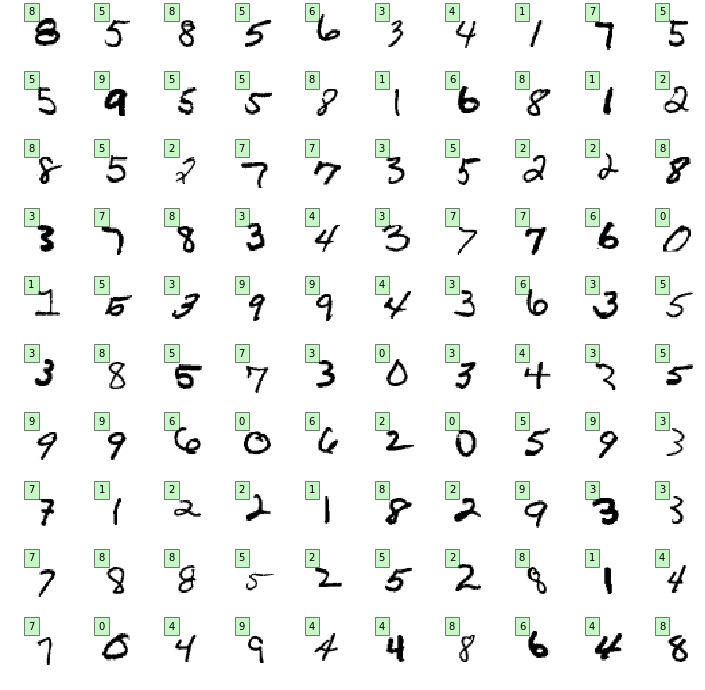

In [0]:
plot_random_100_images(X_train, y_train)

### 1.3 Pre-process the data


In [0]:
height = 28
width = 28
channels = 1
n_inputs = height * width
num_classes = 10
batch_size = 128
epochs = 30

we need to reshape our dataset inputs (X_train and X_test) to the shape that Keras/Tensorflow model expects when we train the model. The first number is the number of images (55,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

We also need to ‘one-hot-encode’ the target variable y_train and y_test. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, 
*   6 should be encoded to [0, 0, 0, 0, 0, 1, 0, 0, 0, 0 ]
*   1 should be encoded to [0, 1, 0, 0, 0, 0, 0, 0, 0, 0 ]
*   0 should be encoded to [1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]
*   and so on.

We use Keras to_categorical function to do this one-hot-encode.



In [0]:
X_train = X_train.astype(np.float32).reshape(X_train.shape[0], height, width, channels)
X_test = X_test.astype(np.float32).reshape(X_test.shape[0], height, width, channels)
input_shape = (height, width, 1)


from keras.utils import to_categorical
#one-hot-encode’ for target variable y_train and y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (60000, 28, 28, 1)
y_train (60000, 10)
X_test (10000, 28, 28, 1)
y_test (10000, 10)


## 2. Build the CNN


Below are brief description of each layer of the CNN model.

### Conv2d
The first 2 layers are Conv2D layers. These are convolution layers that will deal with the input images, which are seen as 2-dimensional matrices.

> ***First Layer:  Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = 'relu')***

>***Second Layer: Conv2D(32, (3, 3), activation = 'relu') ***

1.   The first parameter is the number of nodes which is 64 in the first layer and 32 in the second layer. This number can be adjusted to be higher or lower, depending on the size of the dataset. In our case, 64 and 32 work well, so we will stick with this for now.
2.   The second parameter is the filter size, we use 3 x 3 filter here.
3.   The third parameter is the input shape. This is the shape of each input image, which is 28,28,1 for MNIST dataset for the greyscale images.
3.   The last parameter is activation function for the layer. The activation function we will be using for our first 2 layers is the ReLU. This activation function has been proven to work well in neural networks.
4.   We do not need to specify input_shape for the second layer.

### Max Pooling

> ***MaxPooling2D(pool_size = (2, 2))***

1.    We add MaxPooling for both first and second Layer
2.    The pool size is (2, 2)


### Flattening

1.    Next layer is the ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.

### Dense

1.    Dense is a standard layer type that is used in many cases for neural networks.
2.    We have two Dense layers, the first has 128 units, using "relu" as activation.
3.    The second Dense layer is the output layer, it has 10 units reflecting the 10 classes, it is using "softmap" as activation.


### Dropout

1.    We use two Dropout layer in between to reduce the overfitting.


In [0]:
# Initialising the CNN
cnn_model = Sequential()

# 1 - First Convolution and Pooling layer
cnn_model.add(Conv2D(64, kernel_size=(3, 3), input_shape = input_shape, activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))


# 2 - Second Convolution and Pooling layer
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))


# 3 - Flattening
cnn_model.add(Flatten())

# 4 - Full connection
cnn_model.add(Dense(units = 128, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units = num_classes, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Compiling the model

Next, we need to compile our model. Compiling the model takes three parameters: **optimizer**, **loss** and **metrics**.

The **optimizer** controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

The **loss** function is  ‘categorical_crossentropy’ for our model. This is the most common choice for classification. A lower score indicates that the model is performing better.

The **metrics** we are using is "accuracy", it is to make things easier to interpret, we will be able to see the accuracy score on the validation set when we train the model.

In [0]:
# 5 - Compiling the CNN
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the model

Now we will train our model with training data (train_X), target data (train_y), validation data, and the number of epochs.

For our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test.

The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. 

The training will take some time depends on the amount of data and epoch, the function provide verbose parameter that can display the progress of the training, 
*   verbose=0 will show you nothing (silent)
*   verbose=1 will show you an animated progress bar like this: [================================= ]
*   verbose=2 will just show the number of epoch like this: Epoch 2/3


In [0]:
history = cnn_model.fit(X_train, y_train, 
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 155us/step - loss: 1.2223 - acc: 0.8105 - val_loss: 0.0943 - val_acc: 0.9714
Epoch 2/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.1877 - acc: 0.9451 - val_loss: 0.0646 - val_acc: 0.9802
Epoch 3/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.1395 - acc: 0.9590 - val_loss: 0.0520 - val_acc: 0.9844
Epoch 4/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.1118 - acc: 0.9661 - val_loss: 0.0464 - val_acc: 0.9856
Epoch 5/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.1043 - acc: 0.9685 - val_loss: 0.0386 - val_acc: 0.9873
Epoch 6/30
60000/60000 [==============================] - 3s 54us/step - loss: 0.0904 - acc: 0.9736 - val_loss: 0.0402 - val_acc: 0.9872
Epoch 7/30
60000/60000 [==============================] - 3s 57us/step - loss: 

In [0]:
score = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 50us/step
Test loss: 0.03626842260064463
Test accuracy: 0.9909


In [0]:
score = cnn_model.evaluate(X_train, y_train, verbose=1)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

60000/60000 [==============================] - 3s 52us/step
Train loss: 0.008351563820835432
Train accuracy: 0.9973833333333333


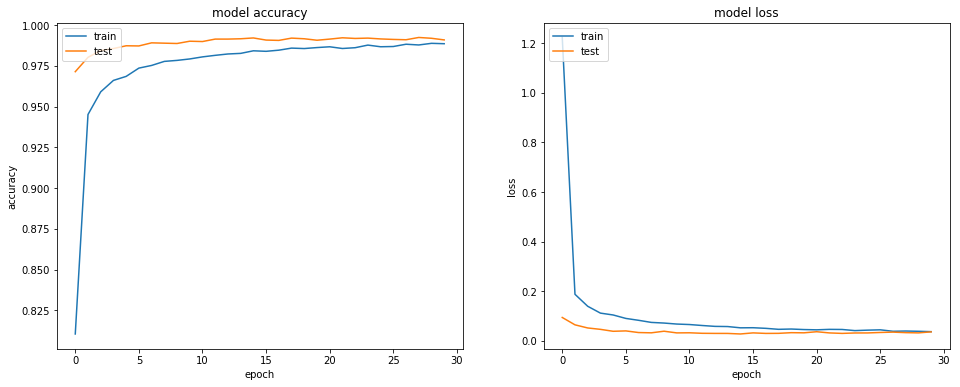

In [0]:
# summarize history for accuracy and history for loss
fig = plt.figure(1, figsize=(16,6))
plt.subplot(1, 2, 1)
plt.title('model accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

## 3. Make predictions

We can use the trained model to make predictions, we will send X_test data to make predictions. 

The predict function will give an array with 10 numbers in each row. These numbers are the probabilities that the input image represents each digit (0–9). The array index with the highest number represents the model prediction. The sum of each array equals 1 (since each number is a probability).

Each array item in the output of predict function looks like: [0.000013, 0.00025, 0.996923, 0.0002, 0.0001, 0.0003 ....], then this value can be seen as [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0].

We can then use np.argmax(predicted[index]) to retrive its value as 2. 



In [0]:
y_test_predicted = cnn_model.predict(X_test,
                                     batch_size=batch_size,
                                     verbose=1)

10000/10000 [==============================] - 0s 25us/step


## Visualize the predicted data

We will plot the random images from the predicted images to visualize the predicted data, together with ground truth label.

The small green number at the top-left is the ground truth label of the image.
The small pink number beside it is the predicted value of the image.


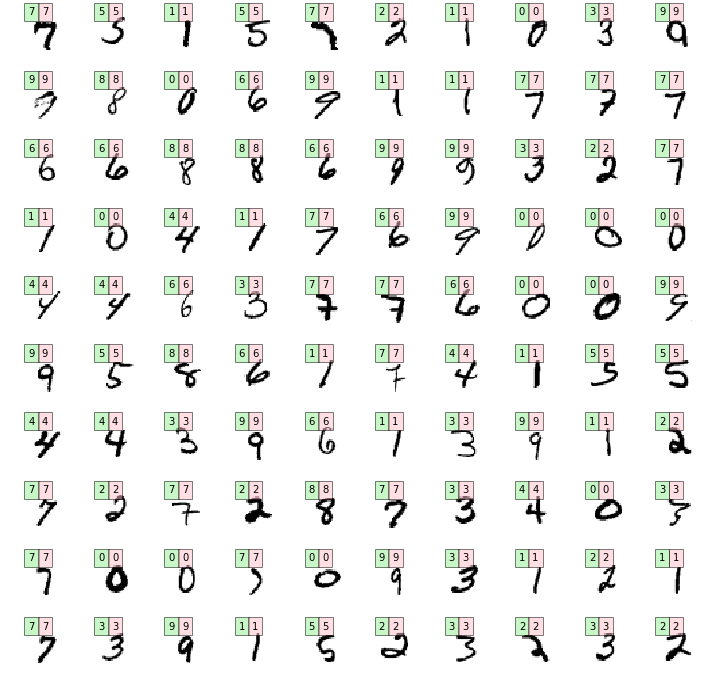

In [0]:
plot_random_100_images(X_test, y_test, prediction = y_test_predicted, label_encoded = True, prediction_provided = True)